# Loader + KDE

In [2]:
import sys
sys.path.append('../codes')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from VMSfunctions.Common import save_obj, load_obj, MZ, RT, INTENSITY, N_PEAKS
from VMSfunctions.DataGenerator import DataSource, DensityEstimator, PeakDensityEstimator, PeakSampler

### 1. Load justin beer data

In [5]:
ds = DataSource(min_ms1_intensity=250000, min_ms2_intensity=5000)
ds.load_data('C:\\Users\\joewa\\Work\\docs\\clms\\\FourBeers_mzML_files\\POS\\')

C:\Users\joewa\Work\docs\clms\\FourBeers_mzML_files\POS\Beer_1_T10_POS.mzML (ms1=143298, ms2=80212)
C:\Users\joewa\Work\docs\clms\\FourBeers_mzML_files\POS\Beer_2_T10_POS.mzML (ms1=141176, ms2=78990)
C:\Users\joewa\Work\docs\clms\\FourBeers_mzML_files\POS\Beer_3_T10_POS.mzML (ms1=138130, ms2=74409)
C:\Users\joewa\Work\docs\clms\\FourBeers_mzML_files\POS\Beer_QC_T10_POS.mzML (ms1=138075, ms2=71365)


### 2. Train ms1 densities

In [6]:
densities = DensityEstimator()

In [7]:
ms_level = 1

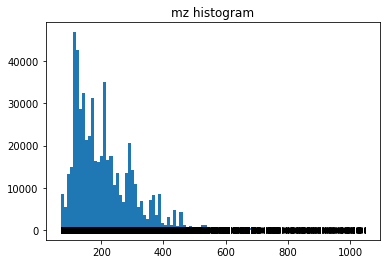

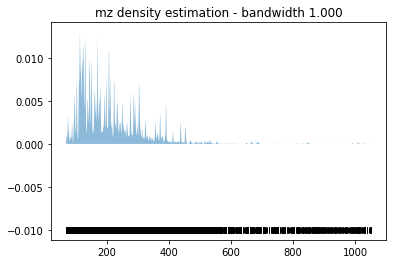

In [8]:
data_type = MZ
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)

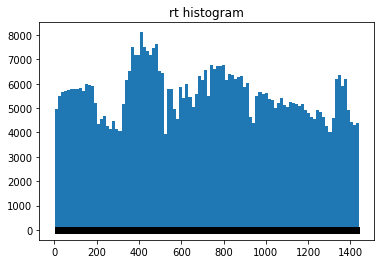

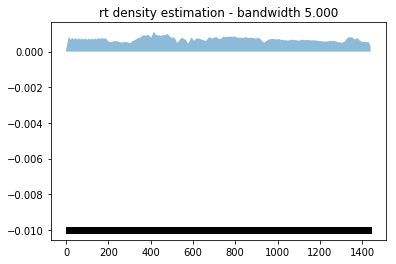

In [9]:
data_type = RT
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5.0, plot=True)

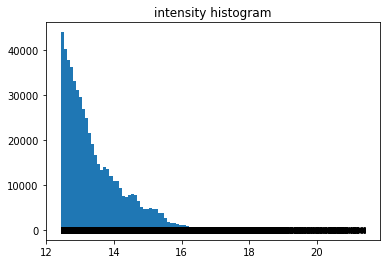

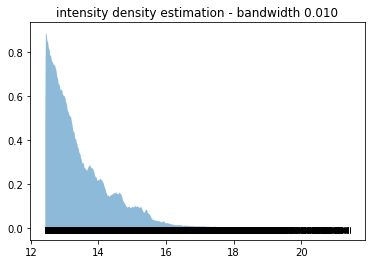

In [10]:
data_type = INTENSITY
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)

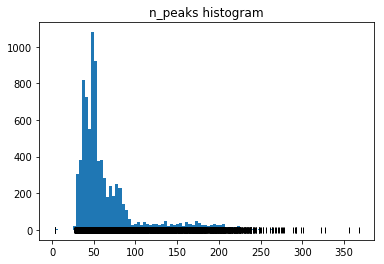

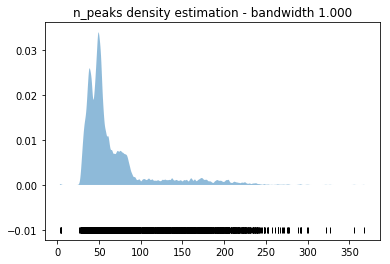

In [11]:
data_type = N_PEAKS
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1, plot=True)

In [12]:
densities.sample(ms_level, 10)

array([[ 124.07384266,   13.02118876, 1116.45932807],
       [ 194.71614586,   14.55859302, 1248.12140942],
       [ 196.10375384,   13.34245832,  489.68977112],
       [ 192.84753967,   13.32773167,  118.34390869],
       [ 293.26784883,   14.76589582, 1049.4606277 ],
       [ 122.97017526,   14.37878883, 1056.92823699],
       [ 112.81584451,   12.62864562,  107.29400361],
       [ 131.95354858,   12.72560319,  176.76481115],
       [ 207.71795646,   12.97893212,  972.27532352],
       [ 555.45673698,   13.12999231,   59.35978809]])

### 3. Train ms2 densities

In [13]:
ms_level = 2

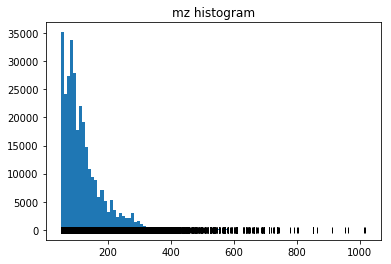

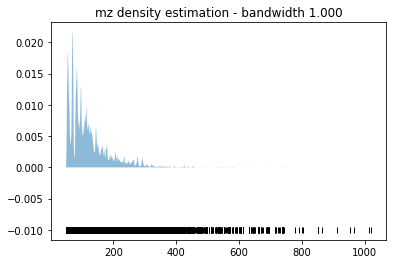

In [14]:
data_type = MZ
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1.0, plot=True)

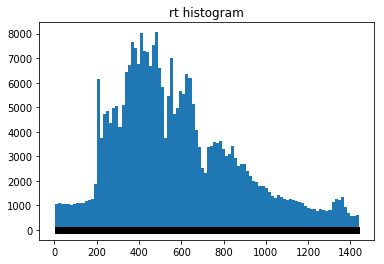

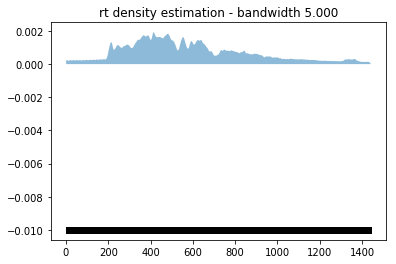

In [15]:
data_type = RT
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=5, plot=True)

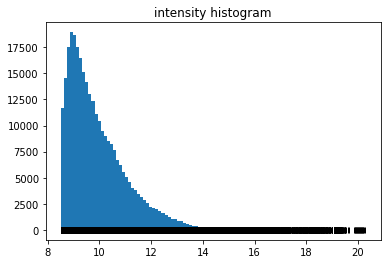

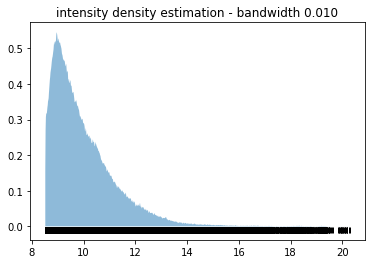

In [16]:
data_type = INTENSITY
ds.plot_histogram(data_type, ms_level, log=True)
densities.kde(ds, data_type, ms_level, log=True, bandwidth=0.01, plot=True)

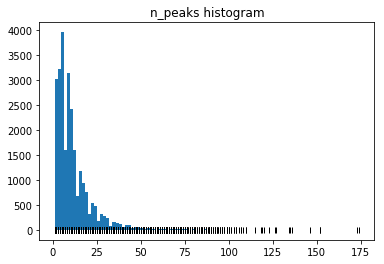

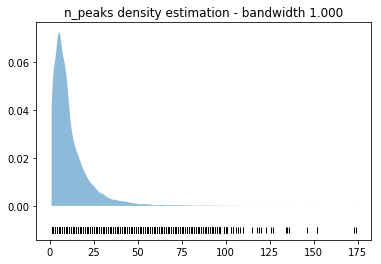

In [17]:
data_type = N_PEAKS
ds.plot_histogram(data_type, ms_level)
densities.kde(ds, data_type, ms_level, log=False, bandwidth=1, plot=True)

In [18]:
densities.sample(ms_level, 10)

array([[100.39908301,   9.85934231, 333.63706349],
       [ 70.21560791,  13.24564838, 466.30351252],
       [ 54.83226175,   9.41850032, 583.58869175],
       [ 68.74425062,   8.91609837, 207.32467908],
       [146.61690244,   8.88916851, 472.45141584],
       [ 86.90727879,   8.97027895, 745.19761539],
       [ 89.06680568,   9.73840661, 403.59072295],
       [ 97.14092209,  10.03156342, 447.1598053 ],
       [ 94.60274348,   9.64172814, 417.50850594],
       [ 72.37067428,  10.02218586, 297.38165234]])

### 4. Alternative KDE where we fit the m/z and intensity together

In [19]:
densities = PeakDensityEstimator()
densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [20]:
densities.sample(1, 10)

array([[ 192.21760211,   12.30913072,  282.62788045],
       [ 105.80566803,   16.7895867 ,  633.46932986],
       [ 304.44439442,   12.29901325,  555.02490788],
       [ 193.78310263,   14.4715538 ,  113.92543468],
       [ 166.86849499,   13.66749141,   77.64410312],
       [ 176.31052372,   15.58602923, 1394.84578603],
       [ 208.788606  ,   17.51686396, 1033.10365537],
       [ 125.81520044,   14.46990065,  710.36300573],
       [ 170.8463046 ,   13.40535913,  641.80405176],
       [ 161.02198978,   14.00762897,  919.5944238 ]])

In [21]:
densities.n_peaks(1, 10)

array([[41.50729097],
       [38.55128589],
       [61.93795034],
       [49.60189015],
       [96.21363377],
       [56.17260101],
       [84.02430025],
       [57.31169823],
       [62.77372461],
       [32.16904609]])

In [22]:
densities.sample(2, 10)

array([[113.69020003,  11.71326693, 716.74929483],
       [ 81.85515586,   8.25996283, 242.70652696],
       [ 85.9750214 ,   8.06950288, 435.11652661],
       [ 56.05999608,   8.55377873, 407.44947646],
       [ 96.76768667,  10.83777431, 484.85258057],
       [121.75351861,  12.51080763, 573.39224443],
       [345.38991894,  10.58674096,  36.43976004],
       [147.67544132,   9.1377193 , 866.86697802],
       [ 87.31278346,  10.93187375, 430.73016225],
       [116.67446046,  12.57564487, 742.09782471]])

In [23]:
densities.n_peaks(2, 10)

array([[ 0.96757082],
       [22.33828235],
       [ 3.92013997],
       [ 4.23154176],
       [16.16047786],
       [ 7.33820086],
       [18.75162952],
       [ 0.23506618],
       [18.13866701],
       [ 2.54847765]])

### 5. Generate some synthetic peaks

In [24]:
ps = PeakSampler(densities)
save_obj(ps, '../models/peak_sampler_4_beers.p')

In [25]:
ps = load_obj('../models/peak_sampler_4_beers.p')

In [26]:
ps.sample(ms_level=1)

[Peak mz=180.9032 rt=613.72 intensity=240236.10 ms_level=1,
 Peak mz=179.2372 rt=422.03 intensity=3038917.70 ms_level=1,
 Peak mz=161.9523 rt=1104.04 intensity=5577802.26 ms_level=1,
 Peak mz=179.9369 rt=508.62 intensity=522932.94 ms_level=1,
 Peak mz=126.0186 rt=697.93 intensity=2553616.38 ms_level=1,
 Peak mz=128.1886 rt=855.95 intensity=717662.39 ms_level=1,
 Peak mz=266.6412 rt=767.35 intensity=322753.21 ms_level=1,
 Peak mz=127.9907 rt=535.11 intensity=351407.93 ms_level=1,
 Peak mz=76.5359 rt=472.39 intensity=527535.56 ms_level=1,
 Peak mz=131.5436 rt=658.81 intensity=658231.32 ms_level=1,
 Peak mz=503.0063 rt=845.03 intensity=219197.32 ms_level=1,
 Peak mz=81.8113 rt=876.63 intensity=99715.94 ms_level=1,
 Peak mz=279.1005 rt=249.75 intensity=2106191.64 ms_level=1,
 Peak mz=95.6714 rt=92.71 intensity=3132046.41 ms_level=1,
 Peak mz=161.9585 rt=313.38 intensity=322639.02 ms_level=1,
 Peak mz=385.0382 rt=508.53 intensity=190027.61 ms_level=1,
 Peak mz=589.7466 rt=599.46 intensity=1

In [27]:
ps.sample(ms_level=1, n_peaks=10)

[Peak mz=133.1576 rt=870.55 intensity=671992.18 ms_level=1,
 Peak mz=104.2493 rt=559.87 intensity=606626.34 ms_level=1,
 Peak mz=151.8233 rt=759.29 intensity=235780.78 ms_level=1,
 Peak mz=97.5753 rt=790.79 intensity=857088.45 ms_level=1,
 Peak mz=356.7423 rt=443.85 intensity=468694.91 ms_level=1,
 Peak mz=211.7874 rt=1322.27 intensity=669004.05 ms_level=1,
 Peak mz=119.5374 rt=67.10 intensity=2513250.68 ms_level=1,
 Peak mz=225.1851 rt=1014.50 intensity=331558.56 ms_level=1,
 Peak mz=244.3767 rt=391.94 intensity=376403.08 ms_level=1,
 Peak mz=233.8376 rt=22.43 intensity=514884.50 ms_level=1]

In [28]:
ps.sample(ms_level=2)

[Peak mz=55.2655 rt=929.91 intensity=29424.35 ms_level=2,
 Peak mz=171.0467 rt=559.20 intensity=32618.34 ms_level=2,
 Peak mz=158.6630 rt=432.75 intensity=19744.98 ms_level=2,
 Peak mz=108.5888 rt=444.90 intensity=4767.46 ms_level=2,
 Peak mz=137.6457 rt=378.99 intensity=19895.13 ms_level=2,
 Peak mz=56.7895 rt=429.01 intensity=60923.95 ms_level=2,
 Peak mz=92.2686 rt=1084.54 intensity=8696.00 ms_level=2,
 Peak mz=170.0583 rt=608.27 intensity=9389.14 ms_level=2,
 Peak mz=85.8462 rt=586.17 intensity=35992.29 ms_level=2,
 Peak mz=117.4082 rt=387.36 intensity=9448.53 ms_level=2,
 Peak mz=130.7744 rt=536.99 intensity=198873.18 ms_level=2,
 Peak mz=174.9969 rt=513.09 intensity=38241.06 ms_level=2,
 Peak mz=296.2521 rt=621.12 intensity=27728.74 ms_level=2,
 Peak mz=73.7139 rt=636.72 intensity=5414.31 ms_level=2,
 Peak mz=278.6146 rt=432.44 intensity=80978.38 ms_level=2,
 Peak mz=55.1620 rt=313.35 intensity=60047.35 ms_level=2,
 Peak mz=104.7937 rt=126.87 intensity=116527439.43 ms_level=2,
 P

In [29]:
ps.sample(ms_level=2, n_peaks=10)

[Peak mz=84.3711 rt=770.06 intensity=6963.43 ms_level=2,
 Peak mz=70.2446 rt=341.17 intensity=6565.06 ms_level=2,
 Peak mz=77.1069 rt=820.88 intensity=2227.11 ms_level=2,
 Peak mz=95.6483 rt=1375.74 intensity=4314.25 ms_level=2,
 Peak mz=87.8870 rt=463.73 intensity=11614.82 ms_level=2,
 Peak mz=86.7385 rt=679.06 intensity=2285.07 ms_level=2,
 Peak mz=111.5441 rt=214.38 intensity=23423.73 ms_level=2,
 Peak mz=152.1417 rt=7.30 intensity=2475.21 ms_level=2,
 Peak mz=265.8034 rt=783.07 intensity=3113.96 ms_level=2,
 Peak mz=56.4005 rt=226.94 intensity=36212.46 ms_level=2]

### 6. Train on Justin's Urine Data

In [30]:
ds = DataSource(min_ms1_intensity=250000, min_ms2_intensity=5000)
ds.load_data('C:\\Users\\joewa\\Work\\docs\\clms\\Urines100Study_mzml_files_peaklist\\mzml_files')

C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS002_FragPos.mzML (ms1=155876, ms2=48891)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS003_FragPos.mzML (ms1=149724, ms2=42212)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS004_FragPos.mzML (ms1=162113, ms2=64779)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS005_FragPos.mzML (ms1=151591, ms2=47341)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS009_FragPos.mzML (ms1=147275, ms2=45851)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS010_FragPos.mzML (ms1=143034, ms2=47188)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS011_FragPos.mzML (ms1=149517, ms2=45908)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS013_FragPos.mzML (ms1=168613, ms2

C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS102_FragPos.mzML (ms1=148511, ms2=46714)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS103_FragPos.mzML (ms1=160051, ms2=59313)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS104_FragPos.mzML (ms1=150091, ms2=50847)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS105_FragPos.mzML (ms1=150314, ms2=48949)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS106_FragPos.mzML (ms1=156310, ms2=50028)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS107_FragPos.mzML (ms1=147241, ms2=51687)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS108_FragPos.mzML (ms1=151033, ms2=53032)
C:\Users\joewa\Work\docs\clms\Urines100Study_mzml_files_peaklist\mzml_files\Urine_NGS110_FragPos.mzML (ms1=165648, ms2

In [31]:
densities = PeakDensityEstimator()
densities.kde(ds, 1, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)
densities.kde(ds, 2, bandwidth_mz_int=1.0, bandwidth_rt=5.0, bandwidth_n_peaks=1.0)

In [32]:
ps = PeakSampler(densities)
save_obj(ps, '../models/peak_sampler_100_urines.p')

In [34]:
ps = load_obj('../models/peak_sampler_100_urines.p')

In [35]:
ps.sample(ms_level=1)

[Peak mz=258.4200 rt=1115.99 intensity=866414.75 ms_level=1,
 Peak mz=147.7413 rt=287.26 intensity=248608.49 ms_level=1,
 Peak mz=83.8728 rt=480.16 intensity=5974659.82 ms_level=1,
 Peak mz=189.1235 rt=846.63 intensity=115847.34 ms_level=1,
 Peak mz=204.0650 rt=1407.35 intensity=4841586.70 ms_level=1,
 Peak mz=161.8794 rt=442.28 intensity=413971.00 ms_level=1,
 Peak mz=129.5723 rt=120.35 intensity=994643.34 ms_level=1,
 Peak mz=332.9773 rt=946.38 intensity=13339066.45 ms_level=1,
 Peak mz=110.4374 rt=371.04 intensity=830261.67 ms_level=1,
 Peak mz=112.5424 rt=1003.47 intensity=1402228.01 ms_level=1,
 Peak mz=87.2089 rt=743.55 intensity=293901.64 ms_level=1,
 Peak mz=140.5131 rt=581.98 intensity=196340.55 ms_level=1,
 Peak mz=172.4313 rt=890.08 intensity=262927.89 ms_level=1,
 Peak mz=223.7137 rt=734.71 intensity=1627486.17 ms_level=1,
 Peak mz=194.0331 rt=151.18 intensity=294424.02 ms_level=1,
 Peak mz=167.1798 rt=987.24 intensity=1548100.12 ms_level=1,
 Peak mz=204.8894 rt=1022.63 int

In [46]:
ps.sample(ms_level=2)

[Peak mz=86.3131 rt=234.73 intensity=13088.13 ms_level=2,
 Peak mz=171.2570 rt=453.83 intensity=41732.31 ms_level=2,
 Peak mz=114.2625 rt=1235.02 intensity=43986.77 ms_level=2,
 Peak mz=83.2799 rt=1008.14 intensity=3082.44 ms_level=2,
 Peak mz=171.6208 rt=1407.52 intensity=7401.52 ms_level=2,
 Peak mz=150.1515 rt=323.58 intensity=14434.51 ms_level=2,
 Peak mz=65.4367 rt=960.57 intensity=3106.39 ms_level=2,
 Peak mz=65.3940 rt=501.09 intensity=21437.48 ms_level=2,
 Peak mz=145.1574 rt=457.27 intensity=16283.89 ms_level=2,
 Peak mz=119.9320 rt=210.27 intensity=5765.19 ms_level=2,
 Peak mz=123.6259 rt=99.45 intensity=520849.66 ms_level=2]